<a href="https://colab.research.google.com/github/commandermaks/Mchine-learning/blob/Soft-computing/UT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


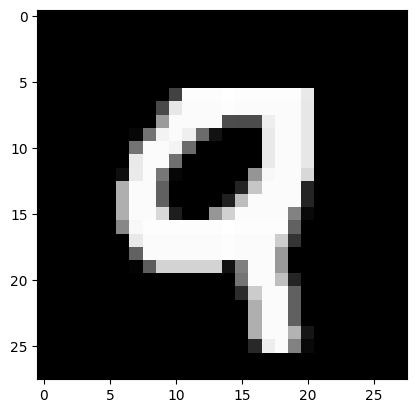

In [ ]:
import matplotlib.pyplot as plt

# Select a random digit
index = np.random.randint(0, len(train_images))
digit = train_images[index]

# Display the digit
plt.imshow(digit, cmap='gray')
plt.show()


In [ ]:
# Flatten the digit
flat_digit = digit.flatten()


In [ ]:
# Train the Discrete Hopfield Model
num_pixels = len(flat_digit)
weights = np.zeros((num_pixels, num_pixels))

for i in range(num_pixels):
    for j in range(num_pixels):
        if i == j:
            weights[i, j] = 0
        else:
            x_i = flat_digit[i]
            x_j = flat_digit[j]
            weights[i, j] += x_i * x_j

# Set the diagonal of the weight matrix to zero
np.fill_diagonal(weights, 0)


<ipython-input-17-0e1edbbfb2f8>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  weights[i, j] += x_i * x_j


In [ ]:
x_i = 1 if sum(x_i * x_j) >= 0 else -1

TypeError: ignored

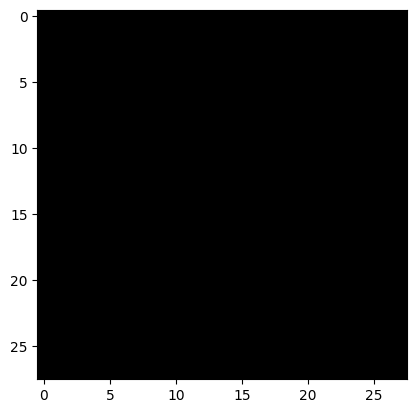

In [ ]:
# Update the Discrete Hopfield Model
x = flat_digit.copy()

for i in range(num_pixels):
    net_input = 0
    for j in range(num_pixels):
        net_input += weights[i, j] * x[j]
    x[i] = 1 if net_input >= 0 else -1

# Reshape the output pattern into a 2D array and display it
output_digit = x.reshape(digit.shape)
plt.imshow(output_digit, cmap='gray')
plt.show()


In [ ]:
# Compute the similarity between the input and output patterns
